In [11]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

import os

print("Current Path", os.getcwd())


Current Path /home/alinjar/manipulator/manipulator_mujoco/plot_script


In [12]:

# 2. Load the CSV file
# Replace 'your_file.csv' with the path to your CSV file



In [13]:
import numpy as np
import pandas as pd  # Needed for pd.read_csv

# Inference settings
inference = np.array([False, True])
line_styles = ['-', '--']  # Solid for False, dashed for True


csv_path_thetadot = []
csv_path_theta = []
df_thetadot = []
df_theta = []

for i in range(len(inference)):
    folder = f'custom_data_inference_{inference[i]}'

    path_tdot = f'../{folder}/thetadot.csv'
    path_theta = f'../{folder}/theta.csv'

    csv_path_thetadot.append(path_tdot)
    csv_path_theta.append(path_theta)

    df_thetadot.append(pd.read_csv(path_tdot))
    df_theta.append(pd.read_csv(path_theta))





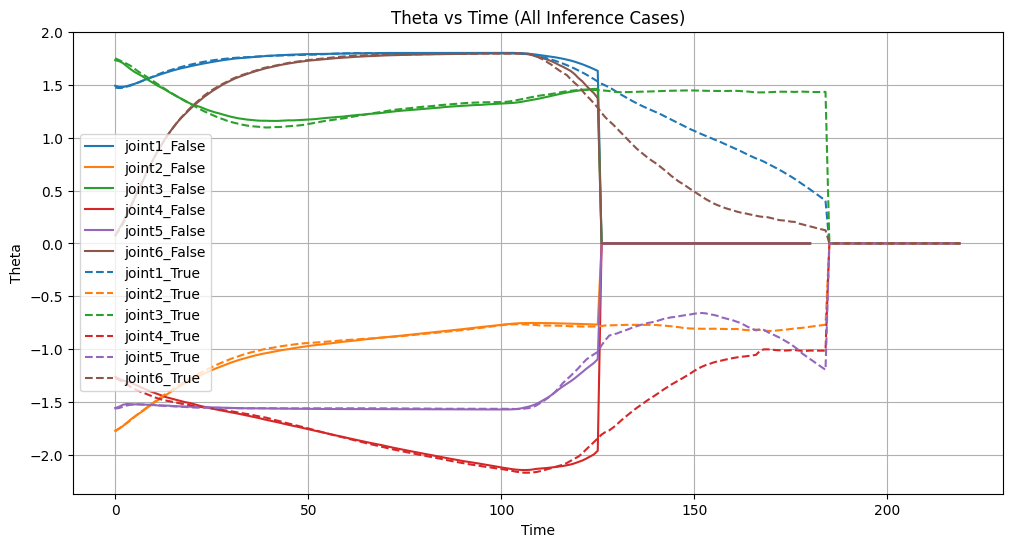

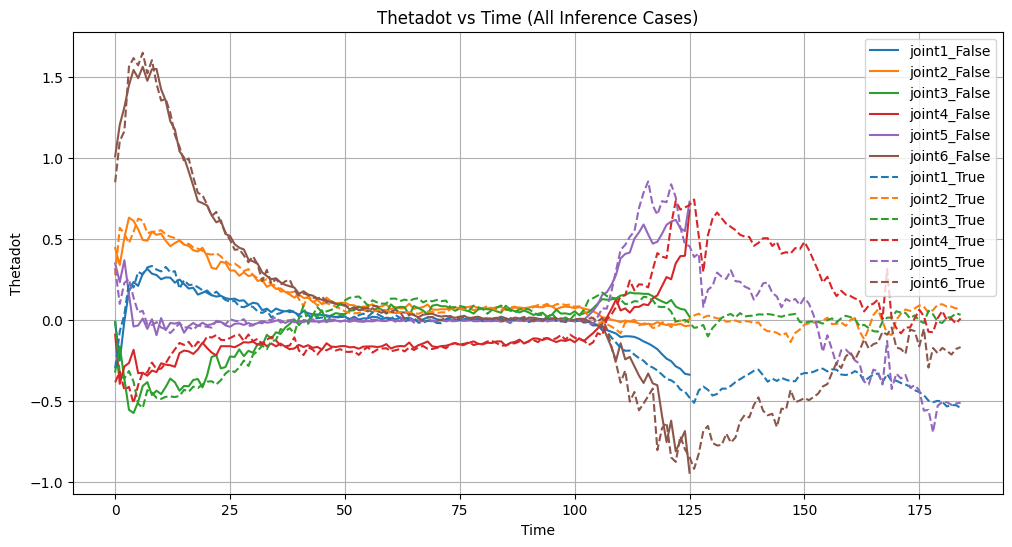

In [14]:


num_joints = df_theta[0].shape[1]
colors = plt.cm.tab10(np.arange(num_joints))

# Output folder
save_dir = "../plot_figures"
os.makedirs(save_dir, exist_ok=True)

# --- Combined plot for theta ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_theta[i].shape[0] - 1, df_theta[i].shape[0])
    for j, col in enumerate(df_theta[i].columns):
        plt.plot(
            x_col,
            df_theta[i][col],
            linestyle=line_styles[i],
            color=colors[j],
            label=f'joint{j+1}_{inference[i]}'
        )
plt.title('Theta vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "theta_vs_time.png"))
plt.show()

# --- Combined plot for thetadot ---
plt.figure(figsize=(12, 6))
for i in range(len(inference)):
    x_col = np.linspace(0, df_thetadot[i].shape[0] - 1, df_thetadot[i].shape[0])
    for j, col in enumerate(df_thetadot[i].columns):
        plt.plot(
            x_col,
            df_thetadot[i][col],
            linestyle=line_styles[i],
            color=colors[j],
            label=f'joint{j+1}_{inference[i]}'
        )
plt.title('Thetadot vs Time (All Inference Cases)')
plt.xlabel('Time')
plt.ylabel('Thetadot')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "thetadot_vs_time.png"))
plt.show()
